# Image classification on fashion MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras

## Load, evaluate and preprocess data

In [2]:
# Import Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
print(len(train_images))
print(len(test_images))
print(train_images[0].shape)
print(train_images.dtype)

60000
10000
(28, 28)
uint8


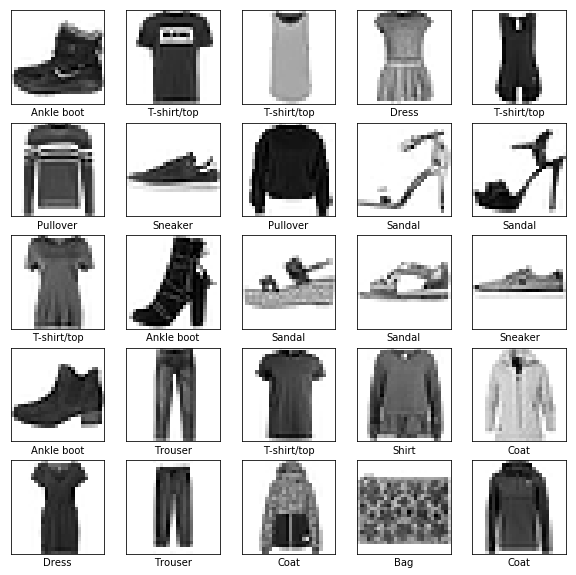

In [4]:
# Display the first 25 images from the training set with class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [5]:
# Preprocess data: Scale values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build and evaluate model

In [6]:
# Setup layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Transform images to 1d-array: 784 input nodes
    keras.layers.Dense(128, activation=tf.nn.relu), # Hidden layer with 128 nodes
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 softmax output nodes
])

# Compile model
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=10) #, batch_size=100)

Epoch 1/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.4949 - acc: 0.8258
Epoch 2/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.3728 - acc: 0.8652
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.3334 - acc: 0.8777 0s - loss: 0.3345 -  - ETA: 0s - loss: 0.3336 - acc: 0.877
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.3110 - acc: 0.8858
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2925 - acc: 0.8919
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2781 - acc: 0.8964: 1
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2657 - acc: 0.9014
Epoch 8/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2565 - acc: 0.9053
Epoch 9/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.2458 - acc: 0.9087
Epoch 10/10
60000/60000 [===========

In [7]:
# Evaluate accuracy on test dataset:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 57us/step
Test accuracy: 0.8815


In [8]:
# Retrain model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.2326 - acc: 0.9143
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.2216 - acc: 0.9167
Epoch 3/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.2143 - acc: 0.9197
Epoch 4/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.2099 - acc: 0.9226
Epoch 5/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.2038 - acc: 0.9232


In [9]:
# Evaluate accuracy on test dataset:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/step
Test accuracy: 0.8871


## Use model to classify images

In [10]:
# Make predictions for all test images
predictions = model.predict(test_images)

In [11]:
# Functions for plotting
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)    
      
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Image number: 6515


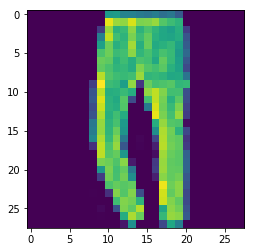

In [16]:
# Select and show image from test set
random_image = np.random.randint(0,len(test_images))
print('Image number:', random_image)
img = test_images[random_image]

plt.imshow(img)

[[2.6122405e-04 9.9968386e-01 1.2820283e-05 1.3306318e-05 2.6564240e-07
  9.6388650e-14 2.8518494e-05 3.1942798e-16 4.0749297e-09 1.6097104e-10]]

 Expected result: Trouser


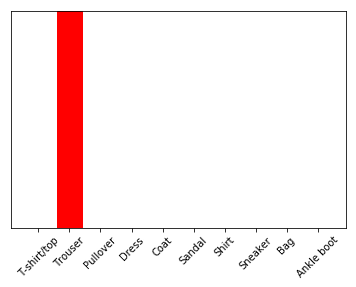

In [17]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
# print(img.shape)

# Get prediction for our image
predictions_single = model.predict(img)
print(predictions_single)

# Plot prediction result
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])

print('\n Expected result:', class_names[test_labels[random_image]])

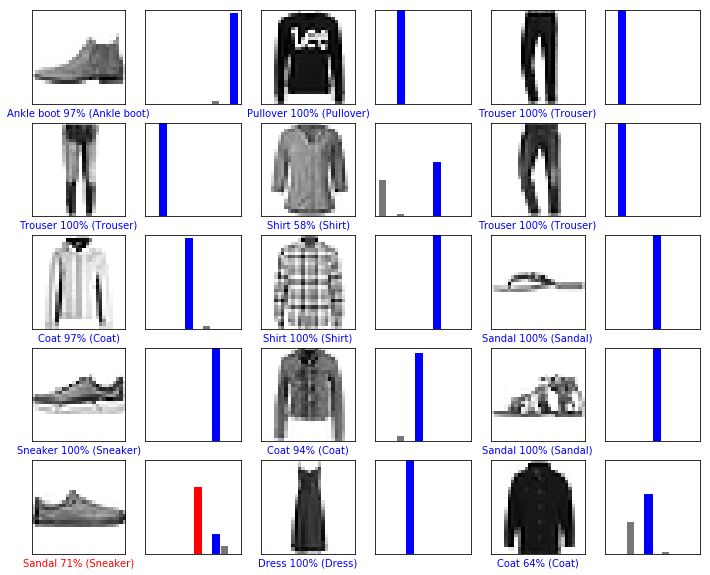

In [18]:
# Plot the first X test images, their predicted label, and the true label
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

## Classify your own pictures

In [17]:
def predict_item(filename, save_converted=False):
    # Load own image
    folder = 'images/'
    img = cv2.imread(folder + filename)

    # Convert
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_inverted = cv2.bitwise_not(img_gray)

    # Resize to 28x28
    img_sizey = len(img)
    img_sizex = len(img[0])
    yfactor = 28/img_sizey
    xfactor = 28/img_sizex
    
    img_small = cv2.resize(img_inverted, None, fx=xfactor, fy=yfactor, interpolation = cv2.INTER_CUBIC)

    # Plot converted image
    plt.imshow(img_small)

    # Open in window with open CV
    # cv2.imshow('Test image',img_small)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Save converted image
    if save_converted == True:
        cv2.imwrite(folder + filename + '_converted.jpg', img_small)
        
    # Make prediction
    img_small_3D = (np.expand_dims(img_small,0))
    predictions_own_image = model.predict(img_small_3D)

    print('The image shows a', class_names[np.argmax(predictions_own_image[0])])

The image shows a Dress


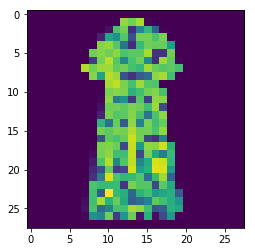

In [28]:
predict_item('image1.jpg')